## Занятие 7
## Математический анализ
## Исследование функции с sympy.calculus.util и sympy.calculus.singularities

In [153]:
import sympy
from sympy import S, Interval, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.calculus.util import continuous_domain, function_range, periodicity, stationary_points, maximum, minimum, AccumBounds
from sympy.calculus.singularities import singularities, is_increasing, is_decreasing, is_monotonic
from sympy.calculus.singularities import is_strictly_increasing, is_strictly_decreasing
%matplotlib inline

## Схема анализа функции.
1. Область определения

sympy.calculus.util.continuous_domain(f, symbol, domain)

f - выражение, описывающее функцию, 

symbol - переменная, от которой зависит исследуемая функция,

domain - область значений переменной, на которой рассматривается функция,

если функция рассматривается на всей вещественной прямой, то domain=S.Reals

Сингулярные точки (точки, в которых функция не существует) находятся с помощью

sympy.calculus.singularities.singularities(f, symbol, domain=None)

2. Область значений

sympy.calculus.util.function_range(f, symbol, domain)

3. Периодичность

sympy.calculus.util.periodicity(f, symbol, check=False)

4. Стационарные точки 

sympy.calculus.util.stationary_points(f, symbol, domain=Reals)

5. Точки экстремума

sympy.calculus.util.maximum(f, symbol, domain=Reals)

sympy.calculus.util.minimum(f, symbol, domain=Reals)

6. Монотонность

sympy.calculus.singularities.is_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_increasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_monotonic(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_increasing(f, interval=Reals, symbol=None)

7. Минимальное и максимальное значение функции на интервале 

sympy.calculus.util.AccumulationBounds(min, max)

Свойства: delta, max, min, mid

### Задание 1.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7 на одном периоде, построить график.
$$
f(x) = e^{\sin(x)}.
$$
###### 1. Область определения

In [154]:
from sympy.abc import x

f = sympy.E ** Sin(x)
domain_f = continuous_domain(f, x, domain=S.Reals)
print("Function domain:")
display(domain_f)

Function domain:


Reals

Сингулярные точки (точки, где функция не определена)

In [155]:
singular_f = singularities(f, x)
print("Singularity points of the function:")
display(singular_f)
if singular_f.is_empty:
    print("No singularity points")

Singularity points of the function:


EmptySet

No singularity points


###### 2. Область значений

In [156]:
e_f = function_range(f, x, domain=S.Reals)
print("Function range:")
display(e_f)

Function range:


Interval(exp(-1), E)

###### 3. Периодичность

In [157]:
period_f = periodicity(f, x, check=False)
print("Function periodicity:")
display(period_f)

Function periodicity:


2*pi

###### 4. Стационарные точки

In [158]:
stat_points_f = stationary_points(f, x)
print("Stationary points:")
display(stat_points_f)

Stationary points:


Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

###### 5. Максимальное и минимальное значения функции

In [159]:
max_f, min_f = maximum(f, x), minimum(f, x)
print("Min value of the function:")
display(min_f)
print("Max value of the function:")
display(max_f)

Min value of the function:


exp(-1)

Max value of the function:


E

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [160]:
interval_f = Interval(0, period_f)
interval_name = "on the interval from 0 to 2π"

interval_dom_f = continuous_domain(f, x, interval_f)
print(f"Function domain {interval_name}:")
display(interval_dom_f)

Function domain on the interval from 0 to 2π:


Interval(0, 2*pi)

Сингулярные точки (точки, где функция не определена)

In [161]:
interval_singular_f = singularities(f, x, interval_f)
print(f"Singularity points of the function {interval_name}:")
display(interval_singular_f)
if interval_singular_f.is_empty:
    print(f"No singularity points {interval_name}")

Singularity points of the function on the interval from 0 to 2π:


EmptySet

No singularity points on the interval from 0 to 2π


###### 2. Область значений

In [162]:
interval_e_f = function_range(f, x, interval_f)
print(f"Function range {interval_name}:")
display(interval_e_f)

Function range on the interval from 0 to 2π:


Interval(exp(-1), E)

###### 4. Стационарные точки 

In [163]:
interval_stat_points_f = stationary_points(f, x, interval_f)
print(f"Stationary points of the function {interval_name}:")
display(interval_stat_points_f)

Stationary points of the function on the interval from 0 to 2π:


{pi/2, 3*pi/2}

###### 5. Максимальное и минимальное значения функции

In [164]:
interval_max_f, interval_min_f = maximum(f, x, interval_f), minimum(f, x, interval_f)
print(f"Min value of the function {interval_name}:")
display(interval_min_f)
print(f"Max value of the function {interval_name}:")
display(interval_max_f)

Min value of the function on the interval from 0 to 2π:


exp(-1)

Max value of the function on the interval from 0 to 2π:


E

###### 6. Монотонность
Исследовать на периоде открытые интервалы (Interval.open), на которые период разбивают стационарные точки.

In [165]:
border_points = list(
    interval_singular_f
    .union(interval_dom_f.boundary)
)
intervals = [
    Interval.open(border_points[i], border_points[i + 1]) \
        for i in range(len(border_points) - 1)
]
for interval in intervals:
    print("Interval:")
    display(interval)
    print("Is monotonic:", is_monotonic(f, interval=interval))
    print("Is increasing:", is_increasing(f, interval=interval))
    print("Is decreasing:", is_decreasing(f, interval=interval))
    print("Is strictly increasing:", is_strictly_increasing(f, interval=interval))
    print("Is strictly decreasing:", is_strictly_decreasing(f, interval=interval))
    print()

Interval:


Interval.open(0, 2*pi)

Is monotonic: False
Is increasing: None
Is decreasing: False
Is strictly increasing: None
Is strictly decreasing: False



###### 7. Минимальное и максимальное значение функции на интервале 
Найти максимальное и минимальное значение функции на каждом из интервалов монотонности в пределах одного периода

In [166]:
for interval in intervals:
    print("Interval:")
    display(interval)
    left = interval.left
    right = interval.right
    interval_value_f = f.subs(x, AccumBounds(left, right))
    print("Function values on the interval:")
    display(interval_value_f)
    print("Function min value on the interval:")
    display(interval_value_f.min)
    print("Function max value on the interval:")
    display(interval_value_f.max)
    print("Delta of function max and min values on the interval:")
    display(interval_value_f.delta)
    print("Middle of function max and min values on the interval:")
    display(interval_value_f.mid)

Interval:


Interval.open(0, 2*pi)

Function values on the interval:


AccumBounds(exp(-1), E)

Function min value on the interval:


exp(-1)

Function max value on the interval:


E

Delta of function max and min values on the interval:


E - exp(-1)

Middle of function max and min values on the interval:


exp(-1)/2 + E/2

###### График функции на одном периоде.

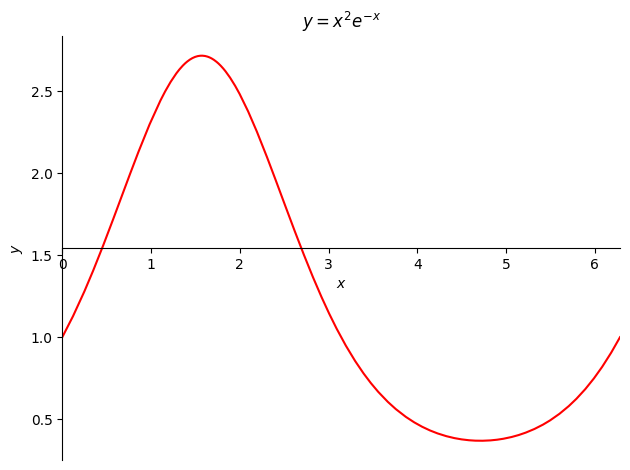

In [167]:
plot(
    f, (x, 0, period_f),
    title="$y = x^2  e^{-x}$",
    line_color='r',
    xlabel = "$x$",
    ylabel = "$y$",
    xlim = (0, period_f),
)
None

### Задание 2.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7  на одном периоде, построить график.
$$
f(x) = \frac{1}{\sin(x) + \cos(x)}.
$$
###### 1. Область определения

In [168]:
from sympy.abc import x

f = 1/(Sin(x) + Cos(x))
domain_f = continuous_domain(f, x, domain=S.Reals)
print("Function domain:")
display(domain_f)

Function domain:


Complement(Reals, Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers)))

Сингулярные точки (точки, где функция не определена)

In [169]:
singular_f = singularities(f, x)
print("Singularity points of the function:")
display(singular_f)

Singularity points of the function:


Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))

###### 2. Область значений

In [170]:
e_f = function_range(f, x, domain=S.Reals)
print("Funtion range:")
display(e_f)

Funtion range:


Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 3. Периодичность

In [171]:
period_f = periodicity(f, x, check=False)
print("Function periodicity:")
display(period_f)

Function periodicity:


2*pi

###### 4. Стационарные точки

In [172]:
stat_points_f = stationary_points(f, x)
print("Stationary points of the function:")
display(stat_points_f)

Stationary points of the function:


Union(Complement(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))), Complement(ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))))

###### 5. Максимальное и минимальное значения функции

In [173]:
max_f, min_f = maximum(f, x), minimum(f, x)
print("Min value of the function:")
display(min_f)
print("Max value of the function:")
display(max_f)

Min value of the function:


-oo

Max value of the function:


oo

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [174]:
interval_f = Interval(0, period_f)
interval_name = "on the interval from 0 to 2π"

interval_dom_f = continuous_domain(f, x, interval_f)
print(f"Function domain {interval_name}:")
display(interval_dom_f)

Function domain on the interval from 0 to 2π:


Union(Interval.Ropen(0, 3*pi/4), Interval.open(3*pi/4, 7*pi/4), Interval.Lopen(7*pi/4, 2*pi))

Сингулярные точки (точки, где функция не определена)

In [175]:
interval_singular_f = singularities(f, x, interval_f)
print(f"Singularity points of the function {interval_name}:")
display(interval_singular_f)

Singularity points of the function on the interval from 0 to 2π:


{3*pi/4, 7*pi/4}

###### 2. Область значений

In [176]:
interval_e_f = function_range(f, x, interval_f)
print(f"Function range {interval_name}:")
display(interval_e_f)

Function range on the interval from 0 to 2π:


Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 4. Стационарные точки

In [177]:
interval_stat_points_f = stationary_points(f, x, interval_f)
print(f"Stationary points of the function {interval_name}:")
display(interval_stat_points_f)

Stationary points of the function on the interval from 0 to 2π:


{pi/4, 5*pi/4}

###### 5. Максимальное и минимальное значения функции

In [178]:
interval_max_f, interval_min_f = maximum(f, x, interval_f), minimum(f, x, interval_f)
print(f"Min value of the function {interval_name}:")
display(interval_min_f)
print(f"Max value of the function {interval_name}:")
display(interval_max_f)

Min value of the function on the interval from 0 to 2π:


-oo

Max value of the function on the interval from 0 to 2π:


oo

###### 6. Монотонность

In [179]:
border_points = list(
    interval_singular_f
    .union(interval_dom_f.boundary)
)
intervals = [
    Interval.open(border_points[i], border_points[i + 1]) \
        for i in range(len(border_points) - 1)
]
for interval in intervals:
    print("Interval:")
    display(interval)
    if is_monotonic(f, interval=interval):
        print("Is monotonic: True")
        print("Is increasing:", is_increasing(f, interval=interval))
        print("Is decreasing:", is_decreasing(f, interval=interval))
        print("Is strictly increasing:", is_strictly_increasing(f, interval=interval))
        print("Is strictly decreasing:", is_strictly_decreasing(f, interval=interval))
    else:
        print("Is monotonic: False")
        print("Is increasing: False")
        print("Is decreasing: False")
        print("Is strictly increasing: False")
        print("Is strictly decreasing: False")
    print()

Interval:


Interval.open(0, 3*pi/4)

Is monotonic: False
Is increasing: False
Is decreasing: False
Is strictly increasing: False
Is strictly decreasing: False

Interval:


Interval.open(3*pi/4, 7*pi/4)

Is monotonic: False
Is increasing: False
Is decreasing: False
Is strictly increasing: False
Is strictly decreasing: False

Interval:


Interval.open(7*pi/4, 2*pi)

Is monotonic: True
Is increasing: False
Is decreasing: True
Is strictly increasing: False
Is strictly decreasing: True



###### 7. Минимальное и максимальное значение функции на периоде

In [180]:
interval_value_f = f.subs(x, AccumBounds(0, period_f))
print("Function values on the interval:")
display(interval_value_f)
print("Function min value on the interval:")
display(interval_value_f.min)
print("Function max value on the interval:")
display(interval_value_f.max)
    

Function values on the interval:


AccumBounds(-oo, oo)

Function min value on the interval:


-oo

Function max value on the interval:


oo

###### График

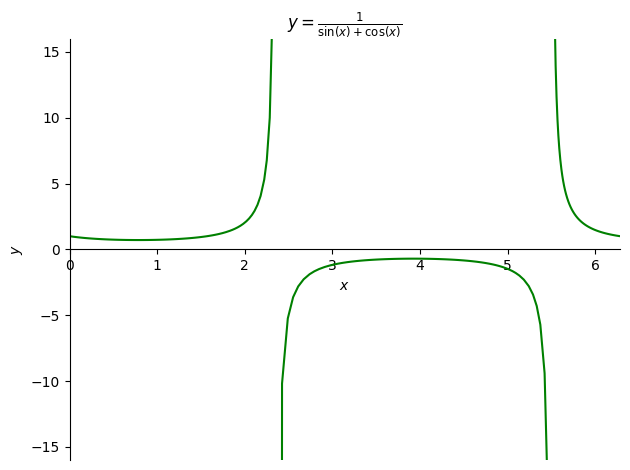

In [181]:
EPSILON: float = 0.001
p = plot(
    title=r"$y = \frac{1}{\sin(x)+\cos(x)}$",
    xlabel = "$x$",
    ylabel = "$y$",
    ylim = (-16, 16),
    xlim = (0, period_f),
    show=False,
)
for interval in intervals:
    p.append(
        plot(
            f, (x, interval.left + EPSILON, interval.right - EPSILON),
            line_color='g',
            show=False,
        )[0]
    )
p.show()

##### Вариант 50
$ f(x) = 2\sqrt{4−7cos(x)} $

### Индивидуальное задание.  
Исследовать функцию $f(x)$, найти минимальное и максимальное значение на каком-нибудь конечном интервале, не содержащем точек разрыва, построить график.
###### 1. Область определения

In [182]:
from sympy.abc import x

f = 2*sympy.sqrt(4 - 7*Cos(x))
domain_f = continuous_domain(f, x, domain=S.Reals)
print("Function domain:")
display(domain_f)

Function domain:


Interval(atan(sqrt(33)/4), -atan(sqrt(33)/4) + 2*pi)

Сингулярные точки (точки, где функция не определена)

In [183]:
singular_f = singularities(f, x, domain=S.Reals)
print("Singularity points of the function:")
display(singular_f)

Singularity points of the function:


EmptySet

###### 2. Область значений

In [184]:
e_f = function_range(f, x, domain=S.Reals)
print("Funtion range:")
display(e_f)

Funtion range:


Interval(0, 2*sqrt(11))

###### 3. Периодичность

In [185]:
period_f = periodicity(f, x, check=False)
print("Function periodicity:")
display(period_f)

Function periodicity:


2*pi

###### 4. Стационарные точки

In [186]:
stat_points_f = stationary_points(f, x)
print("Stationary points of the function:")
display(stat_points_f)

Stationary points of the function:


{pi}

###### 5. Максимальное и минимальное значения функции

In [187]:
interval_max_f, interval_min_f = maximum(f, x, interval_f), minimum(f, x, interval_f)
print(f"Min value of the function {interval_name}:")
display(interval_min_f)
print(f"Max value of the function {interval_name}:")
display(interval_max_f)   

Min value of the function on the interval from 0 to 2π:


0

Max value of the function on the interval from 0 to 2π:


2*sqrt(11)

###### 6. Монотонность  

In [188]:
border_points = list(singular_f.union(domain_f.boundary))
intervals = [
    Interval.open(border_points[i], border_points[i + 1]) \
        for i in range(len(border_points) - 1)
]
for interval in intervals:
    print("Interval:")
    display(interval)
    if is_monotonic(f, interval=interval):
        print("Is monotonic: True")
        print("Is increasing:", is_increasing(f, interval=interval))
        print("Is decreasing:", is_decreasing(f, interval=interval))
        print("Is strictly increasing:", is_strictly_increasing(f, interval=interval))
        print("Is strictly decreasing:", is_strictly_decreasing(f, interval=interval))
    else:
        print("Is monotonic: False")
        print("Is increasing: False")
        print("Is decreasing: False")
        print("Is strictly increasing: False")
        print("Is strictly decreasing: False")
    print()

Interval:


Interval.open(atan(sqrt(33)/4), -atan(sqrt(33)/4) + 2*pi)

Is monotonic: False
Is increasing: False
Is decreasing: False
Is strictly increasing: False
Is strictly decreasing: False



###### 7. Минимальное и максимальное значение функции на интервале 

In [189]:
print("Function values on the interval:")
display(f.subs(x, AccumBounds(0, period_f)))
print("Function min value on the interval:")
display(minimum(f, x, domain=domain_f))
print("Function max value on the interval:")
display(maximum(f, x, domain=domain_f))

Function values on the interval:


2*sqrt(AccumBounds(-3, 11))

Function min value on the interval:


0

Function max value on the interval:


2*sqrt(11)

###### График

2*sqrt(4 - 7*cos(x))

[Interval.open(atan(sqrt(33)/4), -atan(sqrt(33)/4) + 2*pi)]

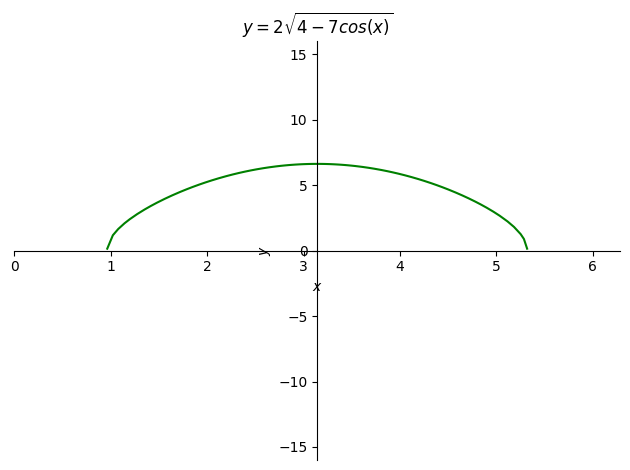

In [190]:
EPSILON: float = 0.001
p = plot(
    title=r"$y = 2\sqrt{4−7cos(x)}$",
    xlabel = "$x$",
    ylabel = "$y$",
    ylim = (-16, 16),
    xlim = (0, period_f),
    show=False,
)
for interval in intervals:
    p.append(
        plot(
            f, (x, interval.left + EPSILON, interval.right - EPSILON),
            line_color='g',
            show=False,
        )[0]
    )
p.show()